# 0.0 Entender o Problema

-- Objetivo do problema:

    -- 1.0 Previsão do primeiro destino que o um novo usuário irá escolher.

    -- Porque?

        -- Qual o tipo do modelo de negócio do Airbnb?

            -- Marketplace (conectar oferta e demanda, e poder ganhar em cima dessa transação).

            -- Oferta (Pessoas oferecem acomodação)

                -- Tamanho do portifólio
                -- Diversidade/densidade de portifólio.
                -- Preço médio.

            -- Demanda (Pessoas procurando acomodação)

                -- Número de usuários
                -- LTV (Lifetime Value - Quanto que a pessoa vai gastar com a empresa)
                -- CAC (Client Acquisition Cost - Custo por cliente)

                Gross Revenue (Margem de lucro) = (fee * Número de usuário) - CAC
                **FEE => É a diferença entre o preço médio e o valor dado a pessoa que oferece a acomadação.**

-- Proposta da Solução:

    -- Modelo de predição do primeiro destino de um novo usuário. Tipo de entrega:

        -- 1.0. Salvar a predição em tabelas no banco de dados para ser acessada por meio de uma ferramenta de visualização.
        -- 2.0. Construção de API e acesso por meio dela:
        
            -- Input: Usuário coloca suas características.
            -- Output: Mostra as características do usuário e a **predição do destino**.

    -- Ciclos para proposta de solução: 16 Ciclos.

# Ciclo 01 <font color = 'red'> - End to End </font>

## 0.0 Imports

In [34]:
import pandas   as pd
import numpy    as np

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt

from keras import models   as ml
from keras import layers   as l


### 0.1. Helper Functions

### 0.2. Loading Data

In [2]:
a = r'D:\CDS\Projetos\PA01\Source\train_users_2.csv'
df_raw = pd.read_csv(a, low_memory=False)
df_raw.shape

(213451, 16)

In [3]:
#b = r'D:\CDS\Projetos\PA01\airbnb_predict\Source\sessions.csv'
#df_sessions = pd.read_csv(b,low_memory=True)
#df_sessions.shape

In [4]:
#df_sessions.sample(2)

## 1.0. Data Description

In [5]:
df1 = df_raw.copy()

In [6]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of collumns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of collumns: 16


In [7]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### 1.1 Data type:

In [8]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

Obs: A coluna date_account_created tem que ser Datetime.

### 1.2 NA check:

In [9]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [10]:
# Remove missing values
df1 = df1.dropna()
df1.shape

(68171, 16)

### 1.3 Change Data Type:

In [11]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [12]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [13]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
# age
df1['age']=df1['age'].astype(np.int64)

In [14]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

### 1.4 Check balanced data:

In [15]:
# Observando o balanceamento da variável resposta
df1['country_destination'].value_counts(normalize=True)

# Obs: Ao excluir as linhas vazias, foi excluído todo uma classe. (NDF = na)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

In [16]:
df = df1.copy()

## 2.0. Data Filtering

### 2.1. Filteringo rows

### 2.2. Columns selection

## 3.0 Data Preparation

In [17]:
cols_categoric = ['gender',
                'signup_method',
                'language',
                'affiliate_channel',
                'affiliate_provider',
                'first_affiliate_tracked',
                'signup_app',
                'first_device_type',
                'first_browser']
# dummy variable
df_dummy = pd.get_dummies( df.drop( ['id','country_destination'], axis=1 ) ) # Retirando as variáveis do ID e a variável resposta (target)

#join id and country destination 
df = pd.concat( [df[['id','country_destination']],df_dummy], axis=1 )

In [18]:
df.head()

,id,country_destination,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,4ft3gnwmtx,US,2010-09-28,2009-06-09 23:12:47,2010-08-02,56,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,other,2011-12-05,2009-10-31 06:01:29,2012-09-08,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,US,2010-09-14,2009-12-08 06:11:05,2010-02-18,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,US,2010-01-02,2010-01-02 01:25:58,2010-01-05,46,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0d01nltbrs,US,2010-01-03,2010-01-03 19:19:05,2010-01-13,47,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## 4.0. Feature Selection

In [19]:
df.sample().T

,93372
id,ukxx1ryyu8
country_destination,US
date_account_created,2013-07-23 00:00:00
timestamp_first_active,2013-07-23 19:51:22
date_first_booking,2013-07-26 00:00:00
...,...
first_browser_Sogou Explorer,0
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0


In [20]:
cols_drop = ['id','date_account_created','timestamp_first_active','date_first_booking'] # Original Dates
df=df.drop(cols_drop,axis=1)
#df.dtypes

In [21]:
X = df.drop('country_destination', axis=1)
y = df['country_destination'].copy()

In [22]:
X

,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,56,3,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,46,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,47,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,55,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213439,43,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213441,34,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213443,36,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 5.0. Machine Learning Model - Neural Network MLP

In [23]:
# Split Dataset into training and test
x_train, x_test, y_train, y_test = ms.train_test_split(
                                                        X,
                                                        y,
                                                        test_size = 0.25,
                                                        random_state=42
                                                        )

In [24]:
#y_train.values # Tem que transformar em valores numéricos. Utiliza-se o One Hot Encoding

In [25]:
#y_train.values.reshape(-1,1)

In [26]:
ohe = pp.OneHotEncoder()
y_ohe = y_train.values.reshape(-1,1)
y_train_nn = ohe.fit_transform(y_ohe).toarray()

In [27]:
#y_train_nn.shape

In [28]:
# Model definition
model = ml.Sequential()
model.add( l.Dense (
                100,
                input_dim =x_train.shape[1],
                activation = 'relu' 
                ) ) # Irá adicionar as Layers da rede neural .. Camada de entrada

model.add( l.Dense (
                    11, #11 por causa do número de saídas
                    activation = 'softmax' 
                    )
                    )

# Model compile
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1598/1598 [==============================] - 6s 2ms/step - loss: 1.3359 - accuracy: 0.7044
Epoch 2/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2597 - accuracy: 0.7065
Epoch 3/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2417 - accuracy: 0.7064
Epoch 4/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2390 - accuracy: 0.7064
Epoch 5/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2084 - accuracy: 0.7067: 0s - l
Epoch 6/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1962 - accuracy: 0.7066
Epoch 7/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1708 - accuracy: 0.7071
Epoch 8/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1720 - accuracy: 0.7069
Epoch 9/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1600 - accuracy: 0.7070
Epoch 10/100
1598/1598 [==============================] - 2s 1ms/

1598/1598 [==============================] - 2s 1ms/step - loss: 1.1030 - accuracy: 0.7098
Epoch 79/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1029 - accuracy: 0.7098
Epoch 80/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1033 - accuracy: 0.7100
Epoch 81/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1026 - accuracy: 0.7099
Epoch 82/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1026 - accuracy: 0.7105
Epoch 83/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1025 - accuracy: 0.7098
Epoch 84/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1017 - accuracy: 0.7103
Epoch 85/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1018 - accuracy: 0.7104
Epoch 86/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1017 - accuracy: 0.7102
Epoch 87/100
1598/1598 [==============================] - 2s 1ms/step - loss:

## 6.0. NN Performance

In [29]:
# prediction 
pred_nn = model.predict( x_test )

In [30]:
# Invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

In [31]:


# Prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1 , -1 )[0]

In [32]:
yhat_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

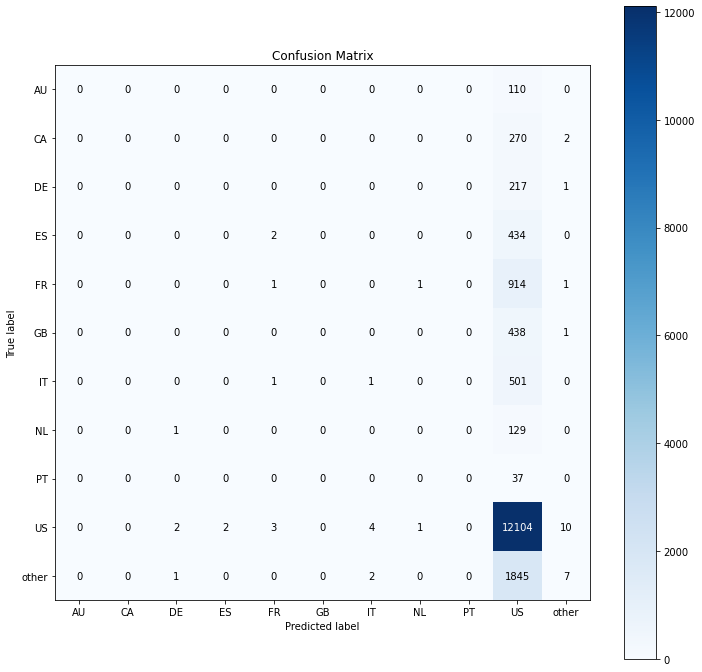

In [33]:
# Accuracy
m.accuracy_score( 
                y_test_nn, 
                yhat_nn
                )
# Confusion Matrix
mt.plot_confusion_matrix(
                        y_test_nn,
                        yhat_nn, 
                        normalize=False, 
                        figsize=(12,12)
                        )